# Internship Data Analysis

This notebook analyzes the internship data collected by the scraper. It provides visualizations and insights to help you find the best internship opportunities.

## 1. Import Libraries

In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

# Set style for plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Increase plot size
plt.rcParams['figure.figsize'] = [12, 8]

## 2. Load Data

In [15]:
# Load internship data
with open('output/internships.json', 'r') as f:
    data = json.load(f)
    
# Convert to DataFrame
df = pd.DataFrame([d for d in data if isinstance(d, dict) and len(d.keys()) > 2])
print(f"Total internships loaded: {len(df)}")

# Show the first few rows
df.head()

Total internships loaded: 274


,id,organization,address,municipality,title,type,tags,website,employees_count,it_employees_count,contact_name,contact_email,contact_gsm,contact_telephone,internship_profile,internship_description,extra_documents
0,1,4infinity,Liesdonk 5,2440 Geel,ICT Systems Improvement and Support,IT-infrastructuur en systeembeheer,"[Technical Support, System Maintenance, Networ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ACA IT Solutions,Herkenrodesingel 8B bus 2.01,3500 Hasselt,Data Engineer,BI / AI,[],http://www.acagroup.be,253,152,Vandereyken Stijn,stijn.vandereyken@acagroup.be,/,+32 11 26 50 10,Jouw profiel: Je volgt een bacheloropleiding i...,"Duvel Moortgat NV, de holding van een van de m...",[]
2,3,ACA IT Solutions,Herkenrodesingel 8B bus 2.01,3500 Hasselt,Data Analyst,BI / AI,[],http://www.acagroup.be,253,152,Vandereyken Stijn,stijn.vandereyken@acagroup.be,/,+32 11 26 50 10,De stageopdracht omvat de volgende taken: Een ...,"ACA Group is een dynamisch, innovatief bedrijf...",[]
3,4,ACA IT Solutions,Herkenrodesingel 8B bus 2.01,3500 Hasselt,Java Developer,Applicatieontwikkeling,[],http://www.acagroup.be,253,152,Vandenput Laurence,laurence.vandenput@acagroup.be,0476039743,0476039743,Je zal als een volwaardig teamlid meehelpen aa...,Na een korte inwerkperiode waarbij je je kan i...,[]
4,5,ACA IT Solutions,Herkenrodesingel 8B bus 2.01,3500 Hasselt,Java Developer,Applicatieontwikkeling,[],http://www.acagroup.be,253,152,Vandenput Laurence,laurence.vandenput@acagroup.be,0476039743,0476039743,Je zal als een volwaardig teamlid meehelpen aa...,Na een korte inwerkperiode waarbij je je kan i...,[]


## 3. Data Overview

In [16]:
# Overview of the data columns
print("Data columns:")
for col in df.columns:
    print(f"- {col}")
    
# Basic info
print("\nData types and non-null counts:")
df.info()

Data columns:
- id
- organization
- address
- municipality
- title
- type
- tags
- website
- employees_count
- it_employees_count
- contact_name
- contact_email
- contact_gsm
- contact_telephone
- internship_profile
- internship_description
- extra_documents

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      274 non-null    int64 
 1   organization            274 non-null    object
 2   address                 274 non-null    object
 3   municipality            274 non-null    object
 4   title                   274 non-null    object
 5   type                    274 non-null    object
 6   tags                    274 non-null    object
 7   website                 273 non-null    object
 8   employees_count         273 non-null    object
 9   it_employees_count      27

## 4. Data Cleaning and Preparation

In [17]:
# Check for missing values
missing_vals = df.isnull().sum()
print("Columns with missing values:")
print(missing_vals[missing_vals > 0])

# Ensure tags are lists
if 'tags' in df.columns:
    def safe_tag_conversion(x):
        # Handle different types of missing/empty values
        if isinstance(x, float) and pd.isna(x):
            return []
        elif isinstance(x, list):
            return x
        elif isinstance(x, np.ndarray):
            return x.tolist() if x.size > 0 else []
        else:
            return [] if x is None else [x]
    
    df['tags'] = df['tags'].apply(safe_tag_conversion)
    # Count tags per row
    df['tags_count'] = df['tags'].apply(len)
    print(f"\nInternships with tags: {(df['tags_count'] > 0).sum()}")
    print(f"Internships without tags: {(df['tags_count'] == 0).sum()}")

Columns with missing values:
website                   1
employees_count           1
it_employees_count        1
contact_name              1
contact_email             1
contact_gsm               1
contact_telephone         1
internship_profile        1
internship_description    1
extra_documents           1
dtype: int64

Internships with tags: 141
Internships without tags: 133


## 5. Basic Analysis

Total unique organizations: 94


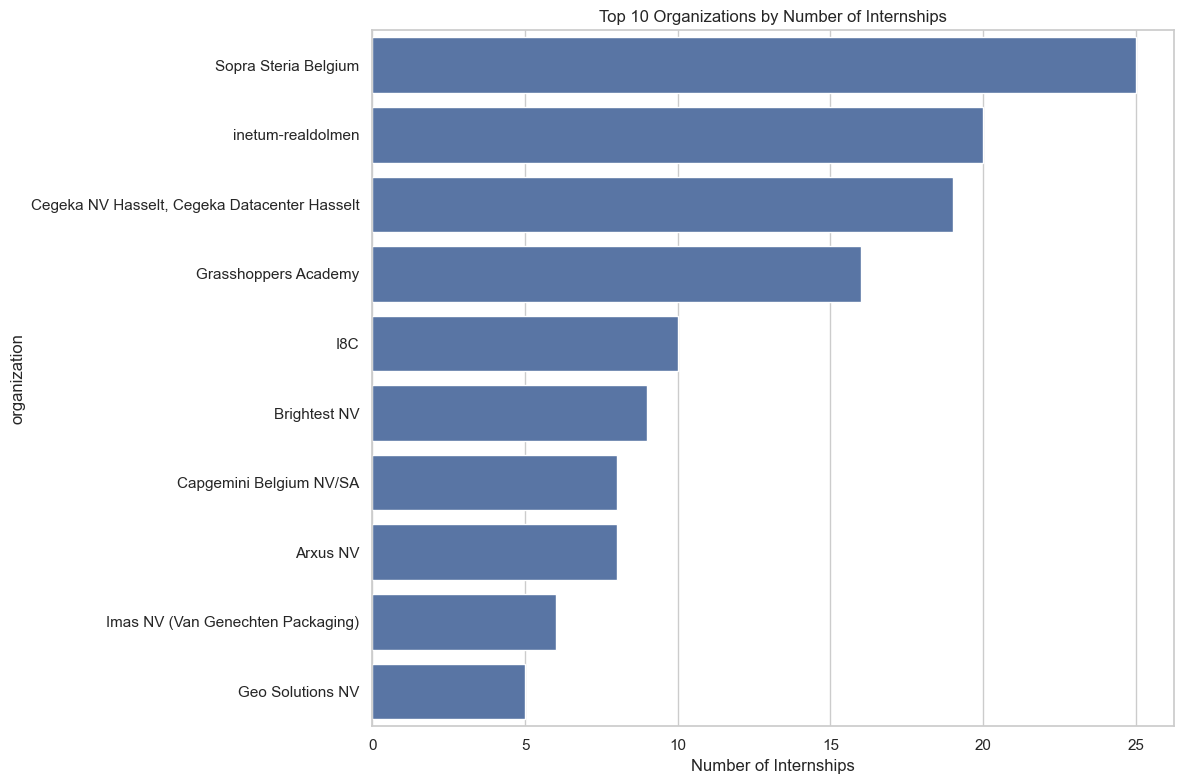

In [18]:
# Number of internships per organization
if 'organization' in df.columns:
    org_col = 'organization'
elif 'company' in df.columns:
    org_col = 'company'
else:
    org_col = None

if org_col:
    print(f"Total unique organizations: {df[org_col].nunique()}")
    
    # Organizations with most internships
    top_orgs = df[org_col].value_counts().head(10)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_orgs.values, y=top_orgs.index)
    plt.title('Top 10 Organizations by Number of Internships')
    plt.xlabel('Number of Internships')
    plt.tight_layout()
    plt.show()

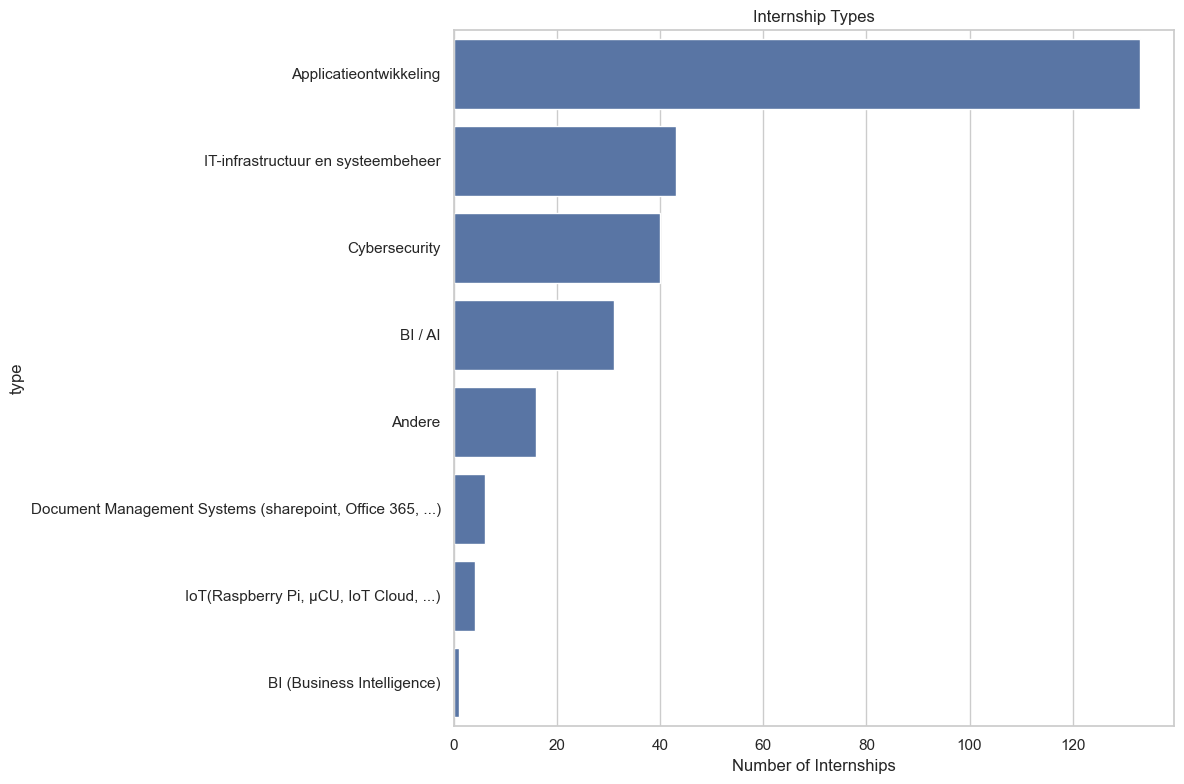

In [19]:
# Internships by type
if 'type' in df.columns:
    plt.figure(figsize=(12, 8))
    type_counts = df['type'].value_counts()
    sns.barplot(x=type_counts.values, y=type_counts.index)
    plt.title('Internship Types')
    plt.xlabel('Number of Internships')
    plt.tight_layout()
    plt.show()

## 6. Tag Analysis

Let's analyze the tags associated with internships to understand the popular skills and technologies.

Total unique tags: 155


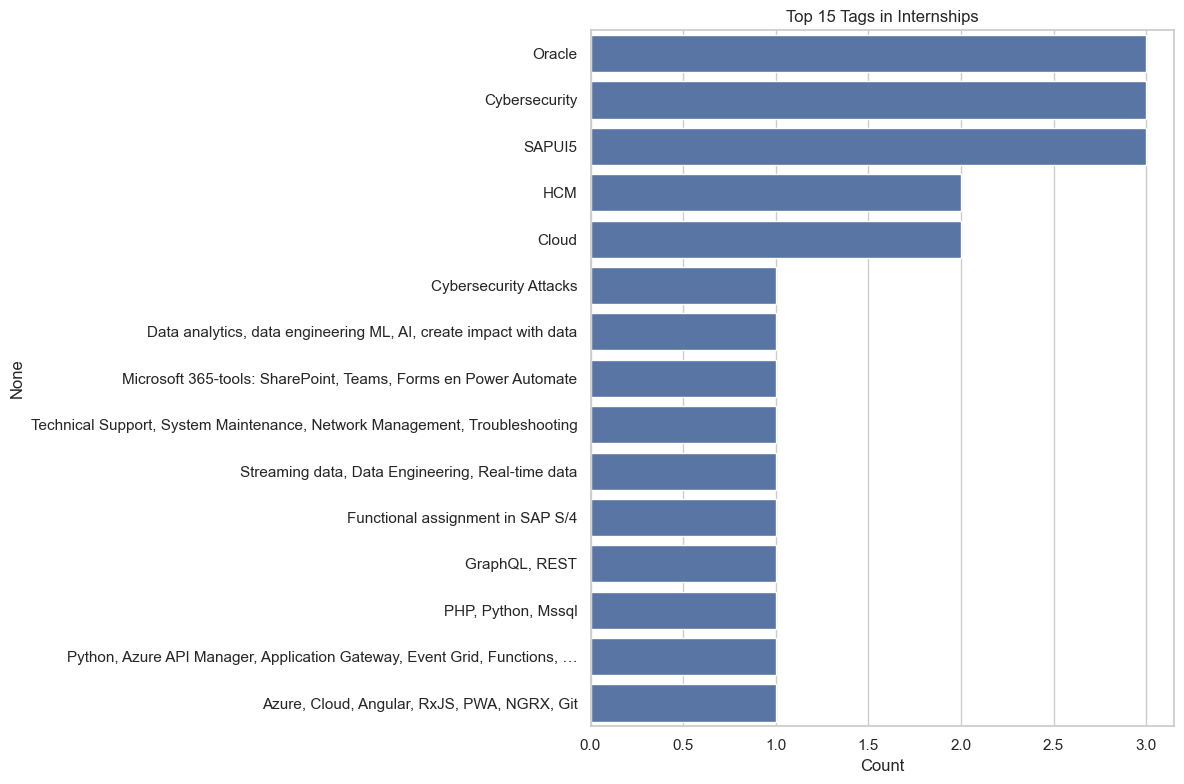

In [20]:
# Function to extract all tags
def extract_all_tags(dataframe):
    if 'tags' not in dataframe.columns:
        return pd.Series()
    
    all_tags = []
    for tags_list in dataframe['tags']:
        if isinstance(tags_list, list) and len(tags_list) > 0:
            all_tags.extend(tags_list)
    return pd.Series(all_tags).value_counts() if all_tags else pd.Series()

# Get all tags
all_tags = extract_all_tags(df)
print(f"Total unique tags: {len(all_tags)}")

# Plot top 15 tags only if we have tags
if len(all_tags) > 0:
    plt.figure(figsize=(12, 8))
    top_tags = all_tags.head(15)
    sns.barplot(x=top_tags.values, y=top_tags.index)
    plt.title('Top 15 Tags in Internships')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("No tags found in the dataset.")

## 7. Location Analysis

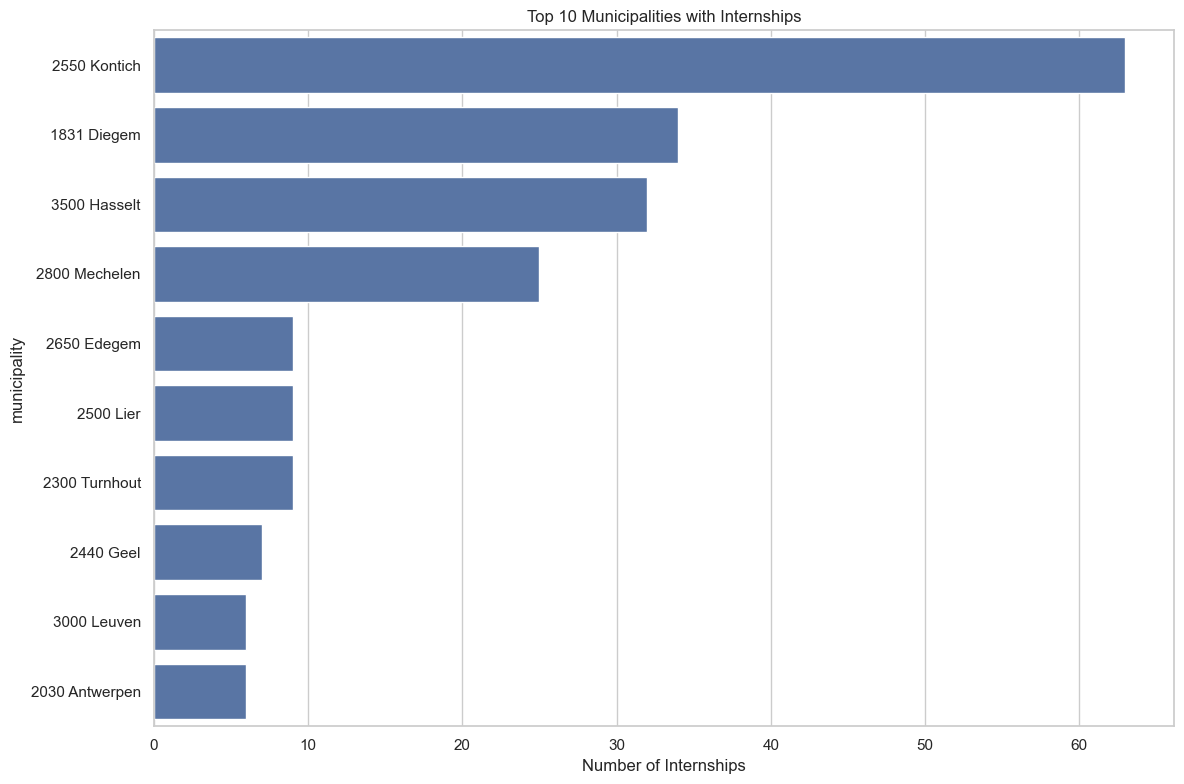

In [21]:
# Internships by municipality/city
if 'municipality' in df.columns:
    plt.figure(figsize=(12, 8))
    city_counts = df['municipality'].value_counts().head(10)
    sns.barplot(x=city_counts.values, y=city_counts.index)
    plt.title('Top 10 Municipalities with Internships')
    plt.xlabel('Number of Internships')
    plt.tight_layout()
    plt.show()

## 8. Text Analysis of Internship Descriptions

Let's analyze the descriptions to find common words and themes.

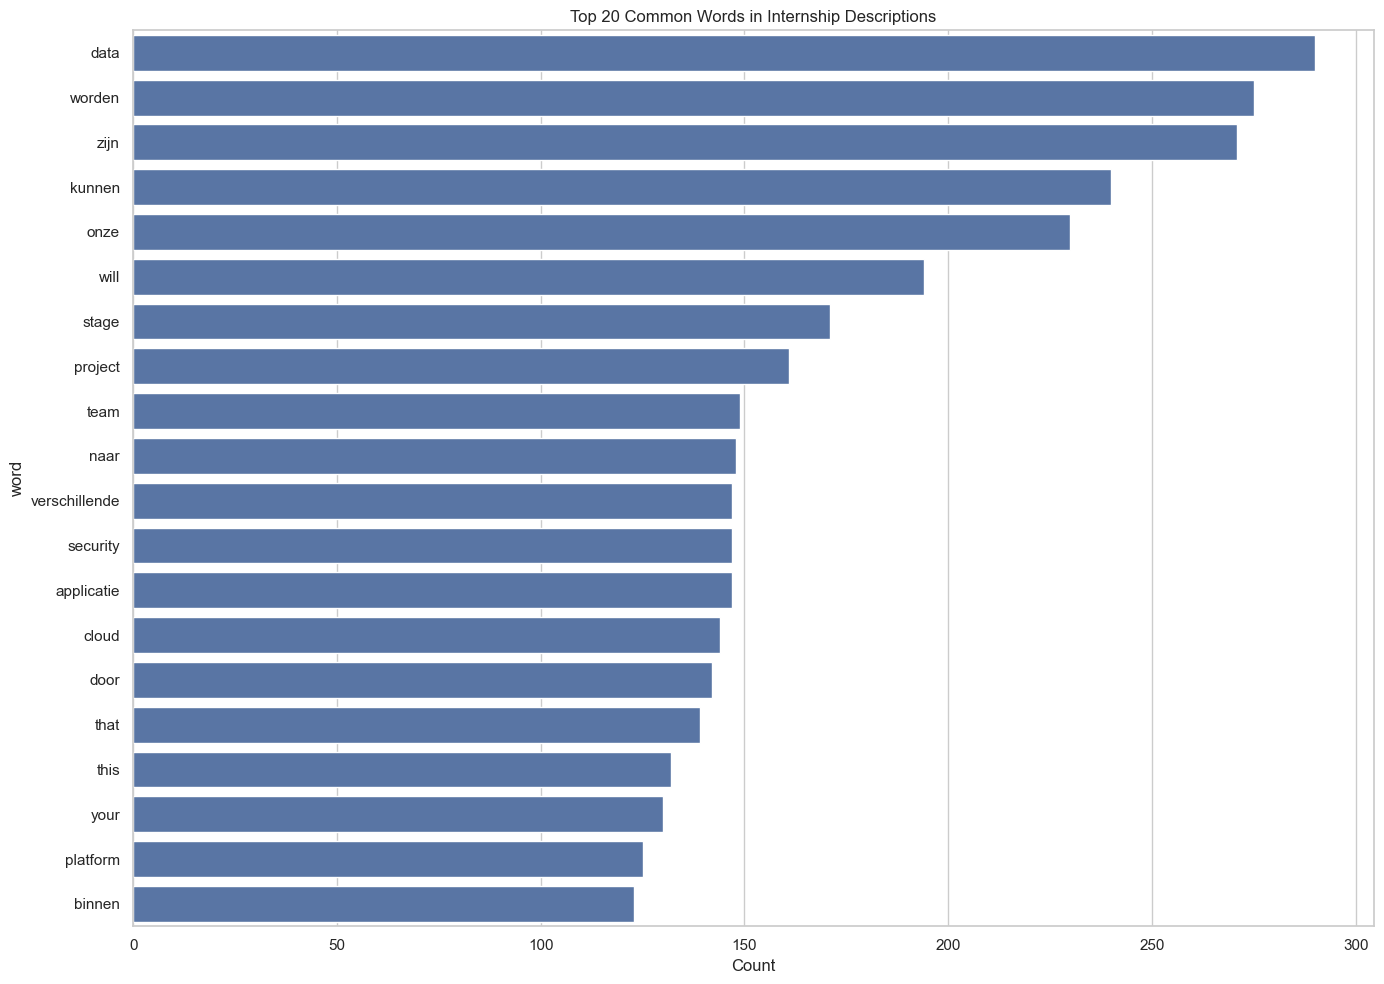

In [22]:
from collections import Counter
import re

# Function to extract common words from descriptions
def extract_common_words(dataframe, column, n=30, min_word_length=4):
    if column not in dataframe.columns:
        return Counter()
    
    # Common stopwords in multiple languages (Dutch, English)
    stopwords = {'de', 'het', 'een', 'en', 'van', 'in', 'op', 'voor', 'met', 'je', 'bij', 'the', 
                'of', 'and', 'to', 'is', 'in', 'for', 'on', 'with', 'you', 'we', 'are', 'als', 'dat',
                'deze', 'die', 'dit', 'er', 'hij', 'zij', 'ze', 'wij', 'we', 'ik', 'jij', 'je', 'zal'}
    
    words = []
    for desc in dataframe[column].dropna():
        if isinstance(desc, str):
            # Extract words, remove punctuation
            text_words = re.findall(r'\b\w+\b', desc.lower())
            # Filter out stopwords and short words
            words.extend([w for w in text_words if w not in stopwords and len(w) >= min_word_length])
    
    return Counter(words).most_common(n)

# Column to analyze
desc_col = 'internship_description' if 'internship_description' in df.columns else 'description'

if desc_col in df.columns:
    common_words = extract_common_words(df, desc_col)
    
    if common_words:  # Check if we have words before plotting
        # Create dataframe for plotting
        words_df = pd.DataFrame(common_words, columns=['word', 'count'])
        
        plt.figure(figsize=(14, 10))
        sns.barplot(x='count', y='word', data=words_df.head(20))
        plt.title('Top 20 Common Words in Internship Descriptions')
        plt.xlabel('Count')
        plt.tight_layout()
        plt.show()
    else:
        print("No description text found for analysis.")

## 9. Filter Internships by Keywords

Let's build a function to filter internships based on keywords.

In [23]:
def filter_internships(dataframe, keywords):
    """Filter internships by keywords in any text field."""
    if isinstance(keywords, str):
        keywords = [keywords]
    
    keywords = [k.lower() for k in keywords]
    
    def match_row(row):
        # Convert all fields to string and join
        text = ' '.join(str(v).lower() for v in row.values)
        return any(k in text for k in keywords)
    
    return dataframe[dataframe.apply(match_row, axis=1)]


tech_keywords = ['python', 'java', 'javascript', 'web', 'mobile', 'dotnet', 'c#', 'html', 'css', 'sql', 'cloud', 'aws', 'azure', 'devops']
tech_internships = filter_internships(df, tech_keywords)

print(f"Found {len(tech_internships)} internships matching tech keywords")
if not tech_internships.empty and org_col is not None:
    display(tech_internships[[col for col in [org_col, 'title', 'type'] if col in tech_internships.columns]].head())
elif not tech_internships.empty:
    display(tech_internships[['title', 'type']].head())
else:
    print("No matching internships found.")

Found 216 internships matching tech keywords


,organization,title,type
2,ACA IT Solutions,Data Analyst,BI / AI
3,ACA IT Solutions,Java Developer,Applicatieontwikkeling
4,ACA IT Solutions,Java Developer,Applicatieontwikkeling
8,Agiliz NV,From Data to Insights: A Complete Project Journey,BI / AI
9,Algorhythm,Exploratie van Streaming Data en Change Data C...,BI / AI


## 10. Score Internships for Your Profile

Let's create a function to score internships based on your profile keywords.

In [28]:
def score_internships(dataframe, profile_keywords):
    """Score internships based on how well they match the profile keywords."""
    profile_keywords = [k.lower() for k in profile_keywords]
    
    def score_row(row):
        # Convert all fields to string and join
        text = ' '.join(str(v).lower() for v in row.values)
        return sum(text.count(k) for k in profile_keywords)
    
    # Create a copy to avoid modifying original
    result_df = dataframe.copy()
    result_df['score'] = result_df.apply(score_row, axis=1)
    return result_df.sort_values(by='score', ascending=False)

# My profile
my_profile = ['python', 'java', 'javascript', 'sql', 'devops', 'web development', 'mobile development']
scored_internships = score_internships(df, my_profile)
scored_positive = scored_internships[scored_internships['score'] > 0]

# Show top 10 matches
print("Top 10 internships matching your profile:")
if not scored_positive.empty:
    cols_to_show = [col for col in ([org_col, 'title', 'score'] if org_col else ['title', 'score']) if col in scored_positive.columns]
    display(scored_positive[cols_to_show].head(10))
else:
    print("No internships found matching your profile keywords.")

Top 10 internships matching your profile:


,organization,title,score
240,Sopra Steria Belgium,XSS Automation Framework,10
172,inetum-realdolmen,Java – Business mapping,9
112,Federal Pensions Service,Stage bij het Business Intelligence Team - keu...,9
160,Imas NV (Van Genechten Packaging),Migratie Mule ESB naar Apache Kamelets,8
124,Grasshoppers Academy,Cloud-Fit-O-Meter,8
116,Ferranti Computer Systems nv,Financieel rapportering platform,7
71,Classid,Schoolplatform,6
263,UnitedConsumers,Afstudeerder Web Developer / ASP C# Java,6
114,Ferranti Computer Systems nv,Automatiseren en integreren effort booking van...,6
17,Arxus NV,PHP microservice to Python,6


## 11. Customize Your Search

Modify the following cell with your own profile keywords to find the best internships for you.

In [35]:
# Enter your profile keywords here
YOUR_PROFILE = ['web development', 'javascript', 'angular', 'vue', 'react', 'frontend', 'nodejs', 'java', 'sql', 'mobile development']

# Score and filter internships
your_matches = score_internships(df, YOUR_PROFILE)
your_matches = your_matches[your_matches['score'] > 0]

print(f"Found {len(your_matches)} internships matching your profile")

if not your_matches.empty:
    print("Top 10 best matches:")
    cols_to_show = [col for col in ([org_col, 'title', 'score'] if org_col else ['title', 'score']) if col in your_matches.columns]
    display(your_matches[cols_to_show].head(10))

    # Show detailed information for the best match
    best_match = your_matches.iloc[0]
    print("\n=== BEST MATCH DETAILS ===")
    print(f"Title: {best_match.get('title', '?')}")
    print(f"Organization: {best_match.get('organization', best_match.get('company', '?'))}")
    print(f"Type: {best_match.get('type', '?')}")
    
    if 'tags' in best_match and isinstance(best_match['tags'], list) and len(best_match['tags']) > 0:
        print(f"Tags: {', '.join(best_match['tags'])}")
    else:
        print("Tags: None")
    
    print(f"\nProfile requirements:\n{best_match.get('internship_profile', '?')}")
    print(f"\nDescription:\n{best_match.get('internship_description', '?')}")
else:
    print("No internships found matching your profile.")

Found 113 internships matching your profile
Top 10 best matches:


,organization,title,score
257,team4talent,T4T Talent Manager & MyPortal uitbouwen,10
193,Katz,Ontwikkel een applicatie met React (Native) vo...,9
172,inetum-realdolmen,Java – Business mapping,9
124,Grasshoppers Academy,Cloud-Fit-O-Meter,7
173,inetum-realdolmen,Java – Internship Follow-up,7
174,inetum-realdolmen,Java: My Career,7
254,Summer Bash Events,Stage react developer,7
112,Federal Pensions Service,Stage bij het Business Intelligence Team - keu...,7
71,Classid,Schoolplatform,6
251,Sopra Steria Belgium,AWS BedRock AI benmarking,6



=== BEST MATCH DETAILS ===
Title: T4T Talent Manager & MyPortal uitbouwen
Organization: team4talent
Type: Applicatieontwikkeling
Tags: C#, .NET, Angular, React, Full stack

Profile requirements:
sterke junior devs die graag full-stack werken

Description:
T4T Talent Manager & MyPortal uitbouwen 

In onze bestaande applicaties, Talent Manager & MyPortal, moeten features bijgebouwd worden om bepaalde business kritische zaken op te volgen en om allerhande informatie te centraliseren. We zoeken naar full-stack developers die zowel de UI als de backend van deze features bouwen. 
De backend is een .NET 6 API (.NET 8 upgrade gepland). Deze maakt gebruik van CQS. De frontend van Talent Manager is een angular applicatie met redux geschreven in Typescript. De frontend van MyPortal is een React applicatie met redux geschreven in Javascript. 

Voorbeeld features die nog te bouwen zijn, zijn de volgende: 

CV Builder 

Bench platform 

Notifications 

Certificates 

Contracts 

… 

Tech stack: C#,